<a href="https://colab.research.google.com/github/nishkarsh25/minimum-time-in-mess/blob/main/minimumtimeinmess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def generate_students(num_students, entry_rate, service_rate, eating_time_mean, eating_time_std):
    """
    Generate students and their service times and eating times.
    """
    # Generate interarrival times
    interarrival_times = np.random.exponential(1/entry_rate, size=num_students)
    # Generate service times
    service_times = np.random.exponential(1/service_rate, size=num_students)
    # Generate eating times
    eating_times = np.random.normal(eating_time_mean, eating_time_std, size=num_students)
    # Compute total time spent in mess
    total_times = service_times + eating_times
    # Compute arrival times
    arrival_times = np.cumsum(interarrival_times)
    # Compute departure times
    departure_times = arrival_times + total_times
    
    
    return arrival_times, service_times, eating_times, departure_times

In [37]:
np.random.seed(42)
num_students = 100
entry_rate = 30.0
service_rate = 1/3.0
eating_time_mean = 20.0
eating_time_std = 5.0

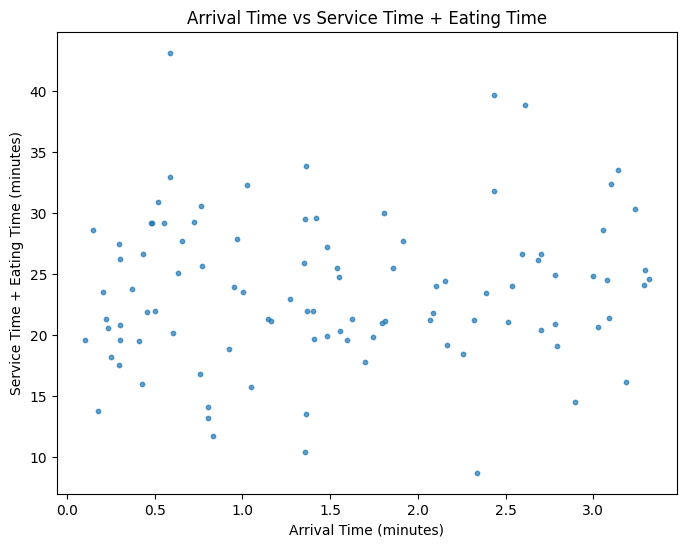

In [41]:
# Generate students and their service times and eating times
arrival_times, service_times, eating_times, departure_times = generate_students(
    num_students, entry_rate, service_rate, eating_time_mean, eating_time_std)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(arrival_times, service_times+eating_times, s=10, alpha=0.7)
ax.set_xlabel('Arrival Time (minutes)')
ax.set_ylabel('Service Time + Eating Time (minutes)')
ax.set_title('Arrival Time vs Service Time + Eating Time')

plt.show()

# Compute time spent in the mess for each student
time_spent = departure_times - arrival_times

# Compute the minimum time spent in the mess
min_time_spent = np.min(time_spent)

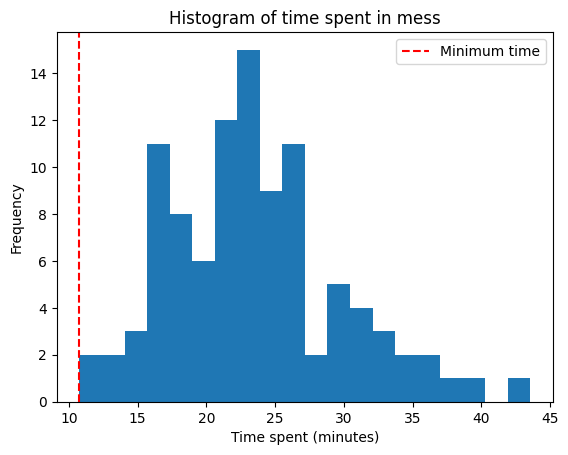

In [39]:
# Plot the histogram of time spent in the mess
plt.hist(time_spent, bins=20)
plt.axvline(x=min_time_spent, color='red', linestyle='--', label='Minimum time')
plt.title('Histogram of time spent in mess')
plt.xlabel('Time spent (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [40]:
print("Minimum time spent in mess:", min_time_spent)

Minimum time spent in mess: 10.76926917689643
